In [1]:
%reload_ext autoreload
%autoreload 2

Loading interpolators: 100%|██████████| 13/13 [00:03<00:00,  3.60it/s]


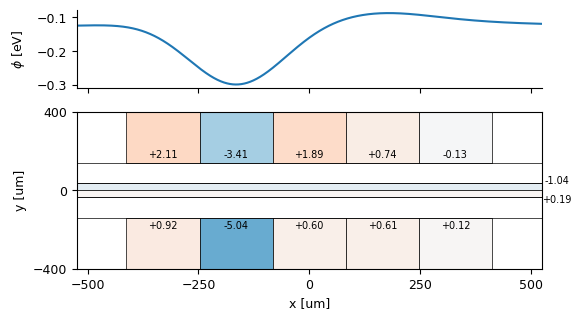

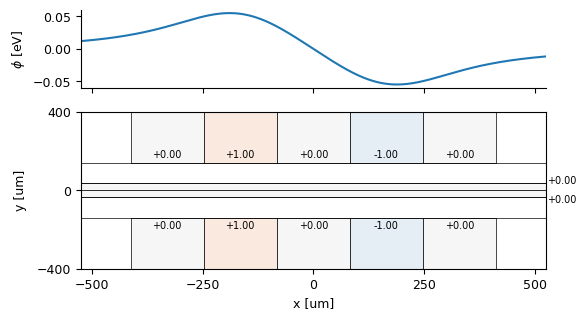

In [2]:
import numpy as np
from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.ions import Ca40, Be9


trap = SurfaceTrap()
voltages = np.array([-1.03680679, 0.19411571, 2.10824776, -3.40701046, 1.88571987,
                     0.73699269, -0.12520335, 0.91544312, -5.0391288, 0.59976997,
                     0.60904511, 0.12365927])

_ = plot_voltages_on_trap(trap, voltages)

voltages_x = np.asarray([
    0, 0, 
    0, 1, 0, -1, 0,
    0, 1, 0, -1, 0,
])
_ = plot_voltages_on_trap(trap, voltages_x)


# Old style

--------------
Analyse potential for ion Ca40: 
Exec minimize
- minimize elapsed time: 42.766 ms
Potential mimimum [um]
[-1.65004747e+02  2.36913530e-02  6.97660839e+01]
Gradient [V/m]
[-0.11704776 -0.62067761 -5.16692653]
Displacement at 1 MHz [um]
[-0.00715832 -0.03795893 -0.315995  ]
Hessian [V/m2]
[[1.63271660e+07 1.66442026e+05 1.30036549e+05]
 [1.66442026e+05 4.69879188e+08 4.99570320e+07]
 [1.30036549e+05 4.99570320e+07 3.82846303e+08]]
Normal mode frequencies [MHz]
[0.999259 5.48881 4.6929]
Eigenvectors
[[1 -0.000431 0.000144]
 [-0.000333 -0.91 -0.414]
 [-0.000309 -0.414 0.91]]
Tilt angle of mode 2 (4.69): 114.47°

--------------
Analyse potential for ion Ca40: 
Set position to r0
Gradient [V/m]
[-442.74549636   -0.           -0.        ]
Displacement at 1 MHz [um]
[-27.0770953  -0.         -0.       ]
Hessian [V/m2]
[[  104541.17854237       -0.00000522 -4037317.85476521]
 [      -0.00000522        0.00004006       -0.00001735]
 [-4037317.85476521       -0.00001735       -0.00

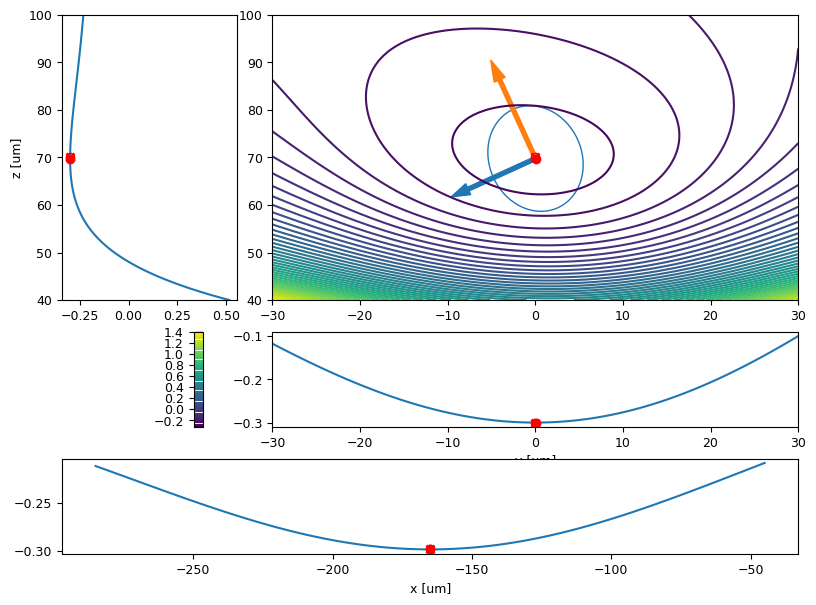

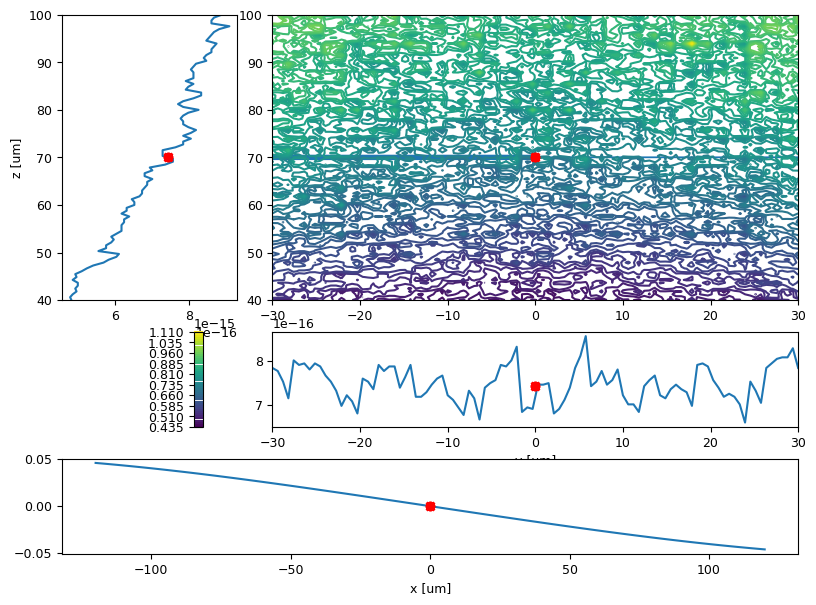

In [3]:
from pytrans.analysis._old_analysis import analyse_potential as old_analyse_potential

# find_3dmin

r0 = (trap.x_ele(2), 0, trap.z0)
res_pot = old_analyse_potential(trap, voltages, ion=Ca40, r0=r0, roi=(120, 30, 30), find_3dmin=True, 
                            minimize_options=dict(accuracy=1e-8))


r1 = (trap.x_ele(3), 0, trap.z0)
res_pot = old_analyse_potential(trap, voltages_x, ion=Ca40, r0=r1, roi=(120, 30, 30), find_3dmin=False, pseudo=False,
                                minimize_options=dict(accuracy=1e-8))


# Single ion, find_3dmin

--------------
Analyse potential for ion Ca40: 
Exec minimize
- minimize elapsed time: 32.015 ms
Equilibrium position [um]
[[-165.00474683    0.02369135   69.76608389]]
Gradient [V/m]
[-0.11704756 -0.62067768 -5.16692664]
Hessian [V/m2]
[[1.63271660e+07 1.66442025e+05 1.30036550e+05]
 [1.66442025e+05 4.69879188e+08 4.99570320e+07]
 [1.30036550e+05 4.99570320e+07 3.82846303e+08]]
Normal modes
  Freq [MHz]                  Ca40
------------  ---------  ---------  ---------
       0.999   1         -0.000333  -0.000309
       4.69    0.000144  -0.414      0.91
       5.49   -0.000431  -0.91      -0.414



AttributeError: 'list' object has no attribute 'mass_amu'

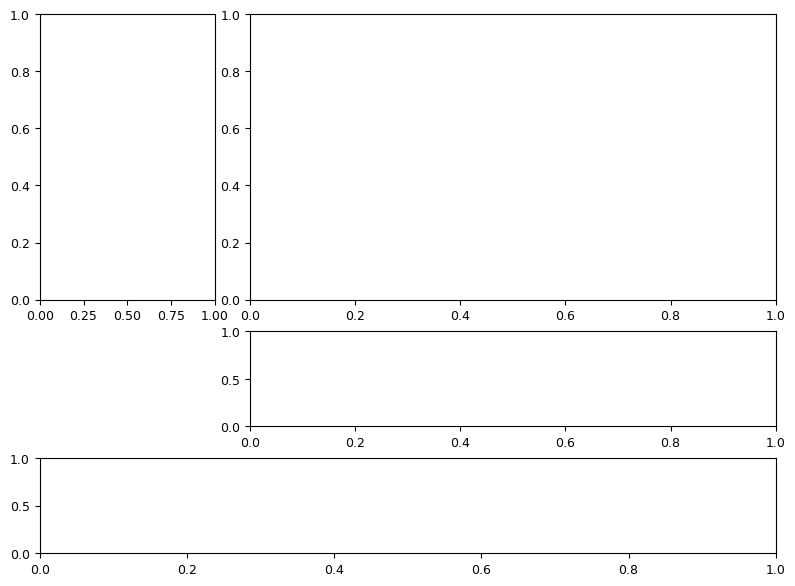

In [5]:

from pytrans.analysis.analysis import analyse_potential

r0 = (trap.x_ele(2), 0, trap.z0)

results = analyse_potential(trap, voltages, ions=Ca40, r0=r0, roi=(120e-6, 30e-6, 30e-6), find_3dmin=True)


## Single ion no 3d_min

In [19]:
results = analyse_potential(trap, voltages_x, ions=Ca40, r0=r1, roi=(120e-6, 30e-6, 30e-6), find_3dmin=False, pseudo=False)


--------------
Analyse potential for ion Ca40: 
Set position to r0
Equilibrium position [um]
[[ 0.  0. 70.]]
Gradient [V/m]
[-442.74549636   -0.           -0.        ]
Hessian [V/m2]
[[  104541.17854237       -0.00000522 -4037317.85476521]
 [      -0.00000522        0.00004006       -0.00001735]
 [-4037317.85476521       -0.00001735       -0.00002095]]
Normal modes
  Freq [MHz]                 Ca40
------------  --------  ---------  -------
    1.57e-06   4.3e-12  -1         1.4e-12
   -0.494      0.703     4.02e-12  0.712
    0.5       -0.712    -2.07e-12  0.703



## multi ion

In [21]:
from pytrans.analysis.mode_solver import init_crystal

n_ions = 3
x0 = init_crystal(r0, 3e-6, n_ions)

ions = [Ca40] * n_ions

results = analyse_potential(trap, voltages, ions=ions, r0=x0, roi=(120e-6, 30e-6, 30e-6), find_3dmin=True)


--------------
Analyse potential for ion string [Ca40, Ca40, Ca40]: 
Equilibrium position [um]
[[-169.80422877    0.02605406   69.77785339]
 [-164.99960756    0.02349015   69.7799026 ]
 [-160.19614073    0.02290339   69.77488107]]
Normal modes
  Freq [MHz]                  Ca40                             Ca40                             Ca40
------------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------
       0.995  -0.578      0.000424  -0.000652  -0.577      0.000192   0.000181  -0.577     -3.97e-05   0.00101
       1.72    0.707     -0.000528   0.000825  -0.0015    -1.48e-05   4.67e-05  -0.707     -5.79e-05   0.00127
       2.4     0.407     -0.000313   0.0005    -0.817      0.000273   0.000257   0.409      4.16e-05  -0.000759
       4.42    0.000531   0.166     -0.373      0.000124  -0.335      0.749     -0.000641   0.164     -0.365
       4.57   -0.000971  -0.29       0.65       5.26e-05  -0.00491    0.0106    -0.00117    0.288   